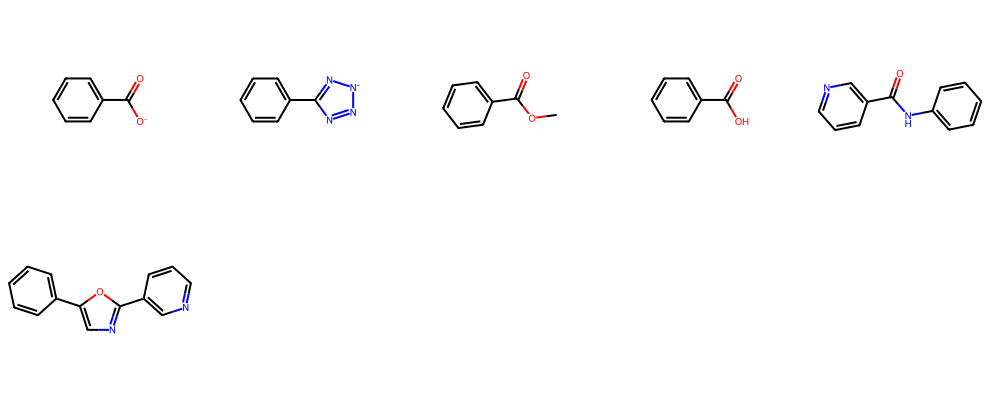

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdChemReactions
from rdkit.Chem import EnumerateHeterocycles
from espsim import EmbedAlignScore
from espsim.helpers import mlCharges
from rdkit.Chem import rdMolAlign
from rdkit.Chem import rdMolDescriptors
from espsim import ConstrainedEmbedMultipleConfs
import espsim
import py3Dmol
import copy
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs

smiles_list = ['c1ccccc1(C(=O)[O-])',
              'c1ccccc1c2n[n-]nn2',
              'c1ccccc1(C(=O)OC)',
               'c1ccccc1(C(=O)O)',
              'c1ccncc1C(=O)Nc2ccccc2',
              'c1ccccc1c3oc(c2cnccc2)nc3']

mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]
Draw.MolsToGridImage(mols, molsPerRow=5)
mol_3d = []
for m in mols:
    m = Chem.AddHs(m)
    AllChem.EmbedMolecule(m)
    AllChem.MMFFOptimizeMolecule(m)
    mol_3d.append(m)
    
Draw.MolsToGridImage(mols, molsPerRow=5)

In [2]:
def draw(ms,p=None, confIds=None):
    if p is None:
        p = py3Dmol.view(width=400, height=400)
    if confIds is None:
        confIds = [-1]*len(ms)
    p.removeAllModels()
    for i,m in enumerate(ms):
        mb=Chem.MolToMolBlock(m, confId=confIds[i])
        p.addModel(mb, 'sdf')
        p.setStyle({'model':i},{'stick':{'radius':0.15}})
    p.setBackgroundColor('white')#'0xeeeeee')
    p.zoomTo()
    return p.show()

def align(prbMol, refMol, prbCrippen=None, refCrippen=None, i=-1, j=-1):
    if prbCrippen == None:
        prbCrippen = rdMolDescriptors._CalcCrippenContribs(prbMol)
    if refCrippen == None:
        refCrippen = rdMolDescriptors._CalcCrippenContribs(refMol)
    alignment= rdMolAlign.GetCrippenO3A(prbMol, refMol, prbCrippen, refCrippen, i, j)
    alignment.Align()
    
def get2Dsim(prbMol, refMol):
    prbMol = Chem.RemoveHs(prbMol)
    refMol = Chem.RemoveHs(refMol)
    prbFp = AllChem.GetMorganFingerprint(prbMol, 2)
    refFp = AllChem.GetMorganFingerprint(refMol, 2)
    return DataStructs.TanimotoSimilarity(prbFp, refFp)

In [3]:
prbmol = copy.deepcopy(mol_3d[0])
refmol = copy.deepcopy(mol_3d[1])
draw([prbmol,refmol])

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [4]:
align(prbmol, refmol)
draw([prbmol,refmol])

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [5]:
spapesim_1, espsim_1 = EmbedAlignScore(prbmol,refmol, refNumConfs=50)
spapesim_2, espsim_2 = EmbedAlignScore(prbmol,refmol, getBestESP=True)
spapesim_3, espsim_3 = EmbedAlignScore(prbmol,refmol, getBestESP=True, partialCharges='ml', refNumConfs=10)
sim2d = get2Dsim(prbmol, refmol)

print(f"ECFP4 TC:{sim2d:.2f} SHAPESIM_1:{spapesim_1[0]:.2f} ESPSIM_1:{espsim_1[0]:.2f}")
print(f"ECFP4 TC:{sim2d:.2f} SHAPESIM_1:{spapesim_2[0]:.2f} ESPSIM_1:{espsim_2[0]:.2f}")
print(f"ECFP4 TC:{sim2d:.2f} SHAPESIM_1:{spapesim_3[0]:.2f} ESPSIM_1:{espsim_3[0]:.2f}")


ECFP4 TC:0.32 SHAPESIM_1:0.85 ESPSIM_1:1.00
ECFP4 TC:0.32 SHAPESIM_1:0.85 ESPSIM_1:1.00
ECFP4 TC:0.32 SHAPESIM_1:0.85 ESPSIM_1:0.99


In [6]:
prbmol = copy.deepcopy(mol_3d[0])
refmol = copy.deepcopy(mol_3d[2])
align(prbmol, refmol)
draw([prbmol,refmol])

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [7]:
spapesim_1, espsim_1 = EmbedAlignScore(prbmol,refmol, refNumConfs=50)
spapesim_2, espsim_2 = EmbedAlignScore(prbmol,refmol, getBestESP=True)
spapesim_3, espsim_3 = EmbedAlignScore(prbmol,refmol, getBestESP=True, partialCharges='ml', refNumConfs=10)
sim2d = get2Dsim(prbmol, refmol)

print(f"ECFP4 TC:{sim2d:.2f} SHAPESIM_1:{spapesim_1[0]:.2f} ESPSIM_1:{espsim_1[0]:.2f}")
print(f"ECFP4 TC:{sim2d:.2f} SHAPESIM_1:{spapesim_2[0]:.2f} ESPSIM_1:{espsim_2[0]:.2f}")
print(f"ECFP4 TC:{sim2d:.2f} SHAPESIM_1:{spapesim_3[0]:.2f} ESPSIM_1:{espsim_3[0]:.2f}")

ECFP4 TC:0.61 SHAPESIM_1:0.88 ESPSIM_1:0.22
ECFP4 TC:0.61 SHAPESIM_1:0.88 ESPSIM_1:0.22
ECFP4 TC:0.61 SHAPESIM_1:0.88 ESPSIM_1:0.44


In [8]:
#compare neutral benzoic acid and benzoic acid methylate
prbmol = copy.deepcopy(mol_3d[3])
refmol = copy.deepcopy(mol_3d[2])
align(prbmol, refmol)
draw([prbmol,refmol])

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [9]:
spapesim_1, espsim_1 = EmbedAlignScore(prbmol,refmol, refNumConfs=50)
spapesim_2, espsim_2 = EmbedAlignScore(prbmol,refmol, getBestESP=True)
spapesim_3, espsim_3 = EmbedAlignScore(prbmol,refmol, getBestESP=True, partialCharges='ml', refNumConfs=10)
sim2d = get2Dsim(prbmol, refmol)

print(f"ECFP4 TC:{sim2d:.2f} SHAPESIM_1:{spapesim_1[0]:.2f} ESPSIM_1:{espsim_1[0]:.2f}")
print(f"ECFP4 TC:{sim2d:.2f} SHAPESIM_1:{spapesim_2[0]:.2f} ESPSIM_1:{espsim_2[0]:.2f}")
print(f"ECFP4 TC:{sim2d:.2f} SHAPESIM_1:{spapesim_3[0]:.2f} ESPSIM_1:{espsim_3[0]:.2f}")

ECFP4 TC:0.61 SHAPESIM_1:0.89 ESPSIM_1:0.85
ECFP4 TC:0.61 SHAPESIM_1:0.88 ESPSIM_1:0.88
ECFP4 TC:0.61 SHAPESIM_1:0.88 ESPSIM_1:0.96


In [10]:
prbmol = copy.deepcopy(mol_3d[-2])
refmol = copy.deepcopy(mol_3d[-1])
draw([prbmol,refmol])

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [11]:
align(prbmol, refmol)
draw([prbmol,refmol])

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [12]:
spapesim_1, espsim_1 = EmbedAlignScore(prbmol,refmol, refNumConfs=50)
spapesim_2, espsim_2 = EmbedAlignScore(prbmol,refmol, getBestESP=True)
spapesim_3, espsim_3 = EmbedAlignScore(prbmol,refmol, getBestESP=True, partialCharges='ml', refNumConfs=10)
sim2d = get2Dsim(prbmol, refmol)

print(f"ECFP4 TC:{sim2d:.2f} SHAPESIM_1:{spapesim_1[0]:.2f} ESPSIM_1:{espsim_1[0]:.2f}")
print(f"ECFP4 TC:{sim2d:.2f} SHAPESIM_1:{spapesim_2[0]:.2f} ESPSIM_1:{espsim_2[0]:.2f}")
print(f"ECFP4 TC:{sim2d:.2f} SHAPESIM_1:{spapesim_3[0]:.2f} ESPSIM_1:{espsim_3[0]:.2f}")


ECFP4 TC:0.42 SHAPESIM_1:0.79 ESPSIM_1:0.40
ECFP4 TC:0.42 SHAPESIM_1:0.79 ESPSIM_1:0.62
ECFP4 TC:0.42 SHAPESIM_1:0.79 ESPSIM_1:0.80
